# **UNEMPLOYMENT ANALYSIS WITH PYTHON**

# **Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Load the Unemployment Dataset**

In [ ]:
df = pd.read_csv("/content/Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# **Data Exploration & Preprocessing**

In [ ]:
# Check data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [ ]:
#Check for Missing Values

print(df.isnull().sum())  # Count missing values in each column


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
#Handle missing vaues
df.ffill(inplace=True)  # Forward fill missing values



In [ ]:
print(df.columns)  # Display all column names


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
df = df.rename(columns=lambda x: x.strip())


In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
#Convert Date Column to Proper Format
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d-%m-%Y")


In [ ]:
df['Date'].head()

,Date
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30


In [ ]:
# Describe Statistics
print(df.describe())


                                Date  Estimated Unemployment Rate (%)  \
count                            768                       768.000000   
mean   2019-12-20 01:48:45.000000256                        11.627969   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.720000   
50%              2019-12-31 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.472500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.566371   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.680000e+02                               768.000000  
mean         7.494411e+06                                42.497956  
min          4.942000e+04                                13.330000  
25%          1.376532e+06                                37.930000

In [ ]:
#Check for Duplicates
print(f"Duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate rows after removal: {df.duplicated().sum()}")




Duplicate rows before removal: 28
Duplicate rows after removal: 0


In [ ]:
#Rename columns
df.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate',
                   'Estimated Employed': 'Employed',
                   'Estimated Labour Participation Rate (%)': 'Labour Participation Rate'}, inplace=True)


In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Area'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

### **Bar Chart: Average Unemployment Rate by Region**

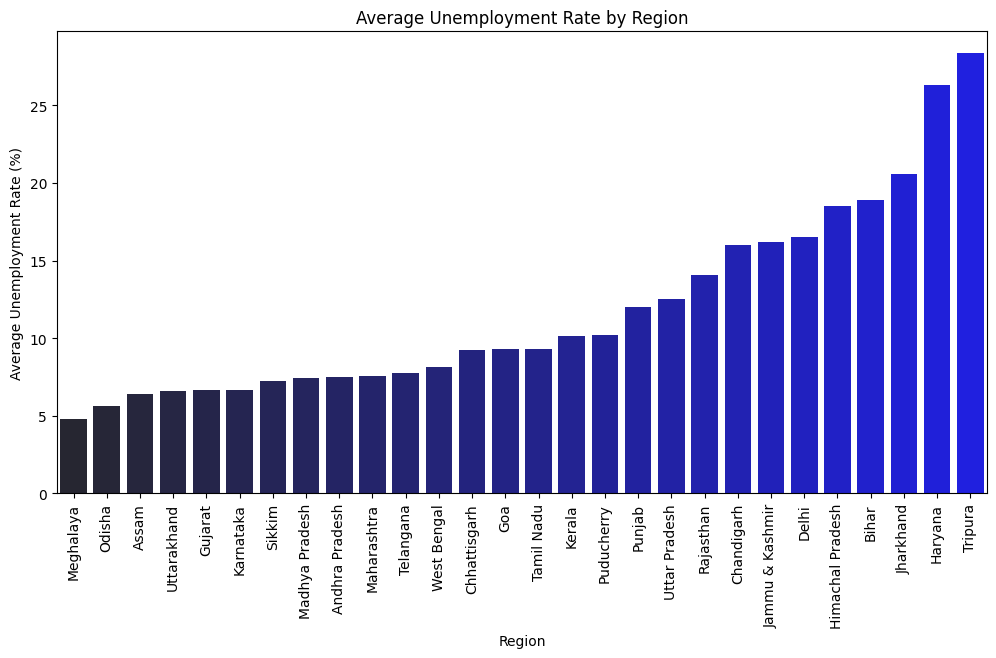

In [ ]:
# Group by Region and find the average unemployment rate
region_unemployment = df.groupby('Region')['Unemployment Rate'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=region_unemployment.index, y=region_unemployment.values,hue=region_unemployment.index, palette="dark:blue",legend=False)

plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate by Region")
plt.xticks(rotation=90)
plt.show()


### **Scatter Plot: Unemployment Rate vs. Labour Participation Rate**

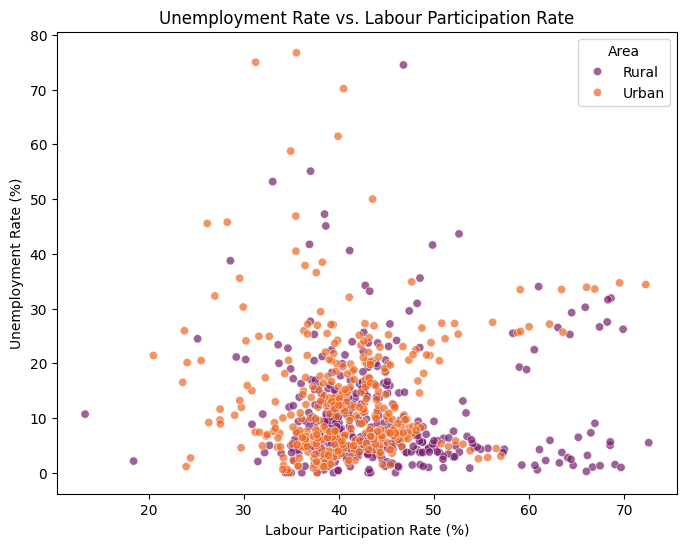

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Labour Participation Rate'],
                y=df['Unemployment Rate'],
                hue=df['Area'], alpha=0.7, palette='inferno')

plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. Labour Participation Rate")
plt.legend(title="Area")
plt.show()


### **Pie Chart: Maximum Unemployment Rate by Area Type (Rural vs Urban)**

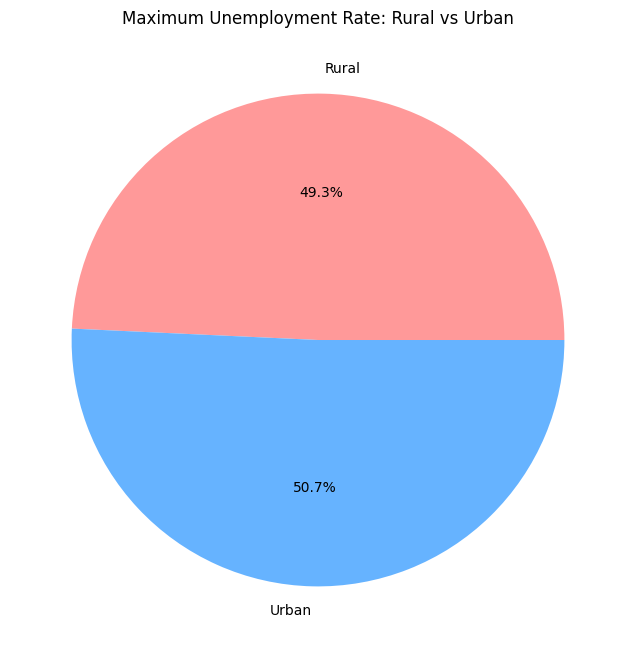

In [ ]:
# Group by 'Area' and get max unemployment rate
area_max = df.groupby('Area')['Unemployment Rate'].max()

plt.figure(figsize=(8, 8))
plt.pie(area_max, labels=area_max.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])

plt.title("Maximum Unemployment Rate: Rural vs Urban")
plt.show()


### **Unemployment Rate Trends: Pre-COVID vs. During COVID-19 Pandemic**

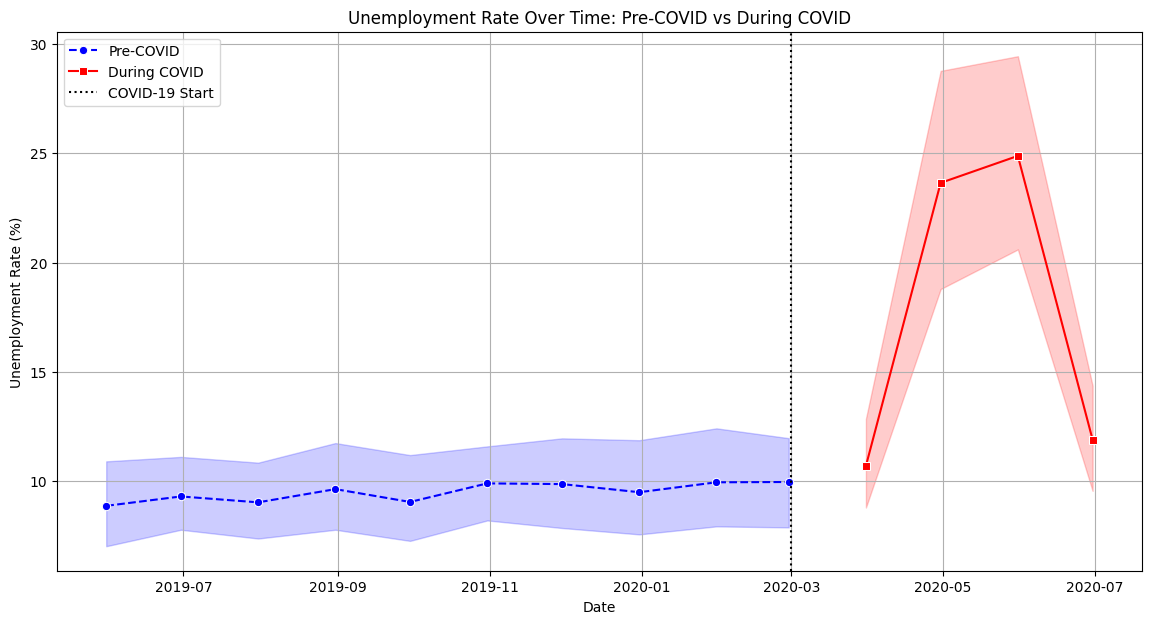

In [ ]:
#Ensure the Date column is in the correct format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#Define pre-COVID and COVID periods (March 2020 as start of COVID)
df['COVID Period'] = df.index < pd.to_datetime('2020-03-01')
df['COVID Period'] = df['COVID Period'].replace({True: 'Pre-COVID', False: 'During COVID'})

#Plot Unemployment Rate Over Time with Different Styles for Pre-COVID and During COVID
plt.figure(figsize=(14, 7))

# Plot Pre-COVID with dashed line
sns.lineplot(x=df[df['COVID Period'] == 'Pre-COVID'].index,
             y=df[df['COVID Period'] == 'Pre-COVID']['Unemployment Rate'],
             marker='o', linestyle='--', color='b', label='Pre-COVID')

# Plot During COVID with solid line
sns.lineplot(x=df[df['COVID Period'] == 'During COVID'].index,
             y=df[df['COVID Period'] == 'During COVID']['Unemployment Rate'],
             marker='s', linestyle='-', color='r', label='During COVID')

#Highlight the COVID-19 start with a vertical line
plt.axvline(pd.to_datetime('2020-03-01'), color='k', linestyle=':', label="COVID-19 Start")

# Adding labels and title
plt.title('Unemployment Rate Over Time: Pre-COVID vs During COVID')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


## **Correlation Heatmap**

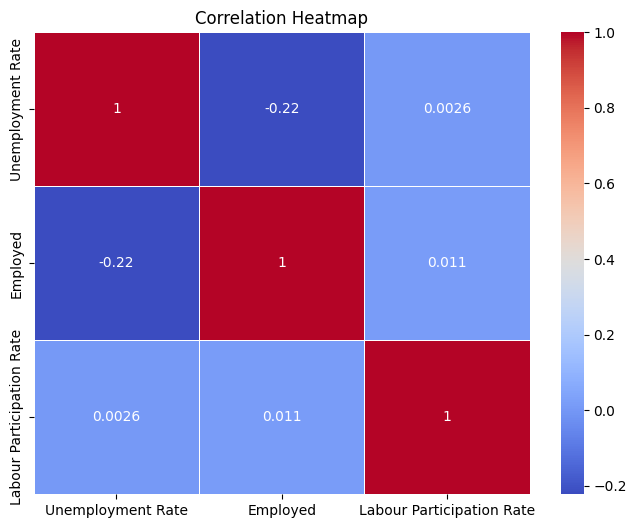

In [ ]:
correlation_matrix = df[['Unemployment Rate', 'Employed', 'Labour Participation Rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Key Findings & Analysis:**

* **Unemployment's Complex Relationship**: Unemployment is linked to both the number of employed people (strongly) and labor participation (weakly). Other things also influence who's in the workforce.
* **Regional Disparities are Stark**: Massive differences in average unemployment exist across regions, suggesting local economic factors are very important. Haryana and Tripura's extremely high rates are particularly concerning.
* **Rural vs. Urban Dynamics**: The relationship between unemployment and labor participation differs in rural and urban areas. Rural areas seem more stable, while urban areas are more vulnerable.
* **COVID-19's Clear Impact**: COVID-19 caused a sharp increase in unemployment and it remained high for a considerable period, demonstrating a significant negative economic impact.









